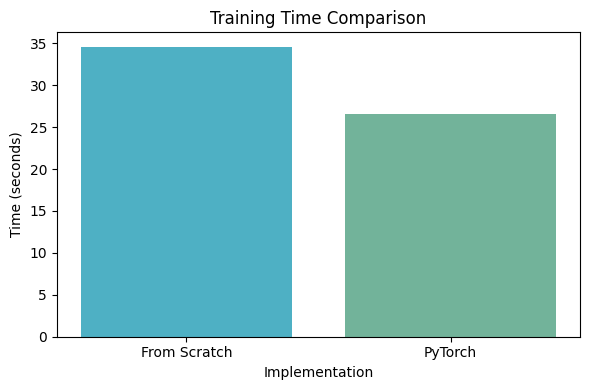

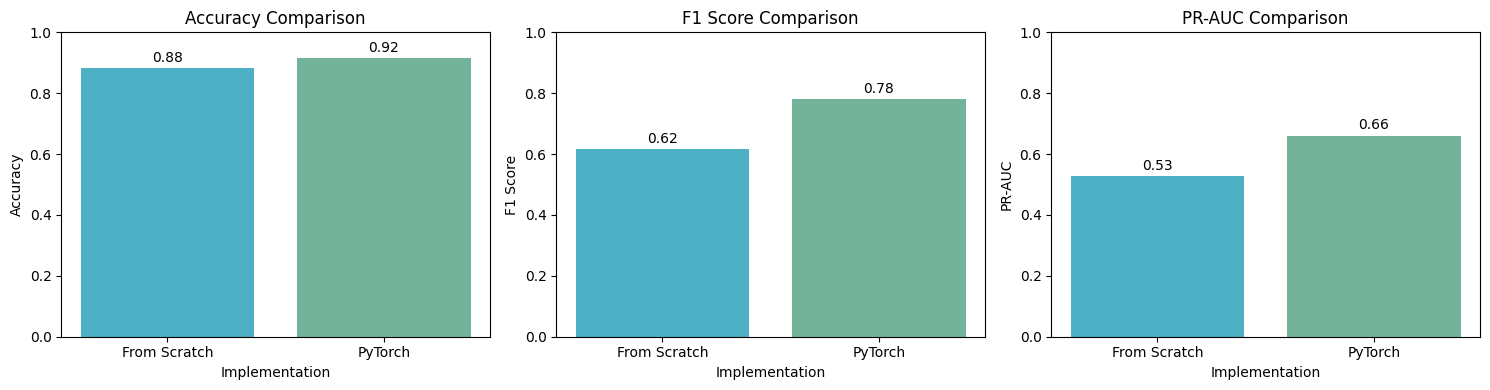

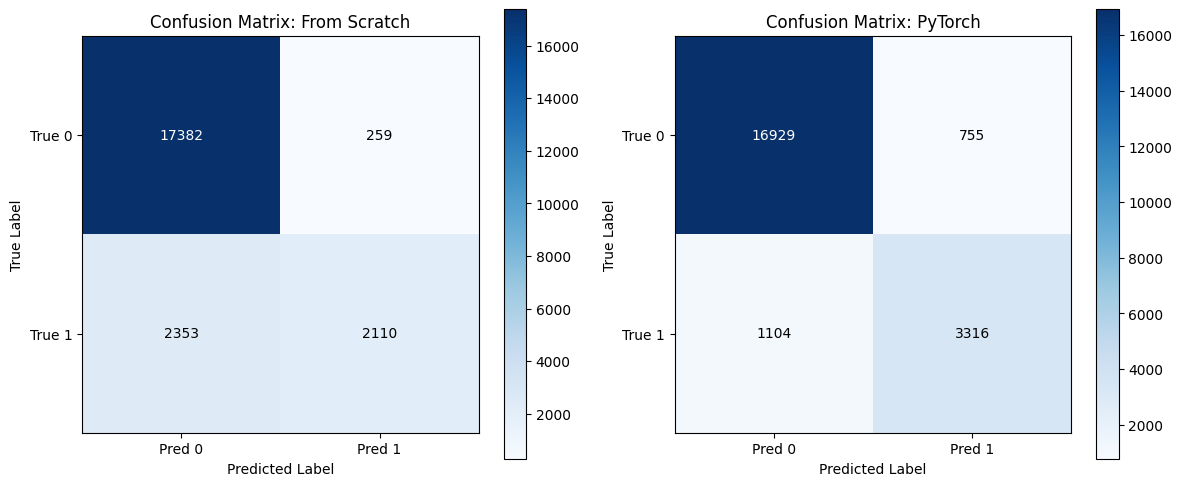

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

metrics = {
    'Approach': ['From Scratch', 'PyTorch'],
    'Training Time (s)': [34.58730936050415, 26.567100048065186],
    'Accuracy': [0.8818313427433948, 0.9158975750995295],
    'F1 Score': [0.6176814988290398, 0.7810623012601579],
    'PR-AUC': [0.527539415842822, 0.6610364078782504]
}

df_metrics = pd.DataFrame(metrics)

# 1. Training Time Comparison
plt.figure(figsize=(6,4))
plt.bar(df_metrics['Approach'], df_metrics['Training Time (s)'], color=["#4eb0c4", "#72b39a"])
plt.title('Training Time Comparison')
plt.ylabel('Time (seconds)')
plt.xlabel('Implementation')
plt.tight_layout()
plt.show()

# 2. Performance Metrics Comparison
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for ax, metric in zip(axes, ['Accuracy', 'F1 Score', 'PR-AUC']):
    ax.bar(df_metrics['Approach'], df_metrics[metric], color=["#4eb0c4", "#72b39a"])
    ax.set_title(f'{metric} Comparison')
    ax.set_ylim(0, 1)
    ax.set_ylabel(metric)
    ax.set_xlabel('Implementation')
    for i, v in enumerate(df_metrics[metric]):
        ax.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()

# 3. Confusion Matrix Heatmaps
scratch_cm = np.array([[17382, 259], [2353, 2110]])
pytorch_cm = np.array([[16929, 755], [1104, 3316]])
cms = [scratch_cm, pytorch_cm]
titles = ['Confusion Matrix: From Scratch', 'Confusion Matrix: PyTorch']

fig, axes = plt.subplots(1, 2, figsize=(12,5))
for ax, cm, title in zip(axes, cms, titles):
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.set_title(title)
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_xticklabels(['Pred 0', 'Pred 1'])
    ax.set_yticklabels(['True 0', 'True 1'])
    plt.colorbar(im, ax=ax)
    for i in range(2):
        for j in range(2):
            if(i==0 and j==0):
                ax.text(j, i, cm[i,j], ha='center', va='center', color='white')
            else:
                ax.text(j, i, cm[i,j], ha='center', va='center', color='black')
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')
plt.tight_layout()
plt.show()
